Today's lecture will be a whirlwind tour of some of the major topics to be covered in this course. Don't worry if you don't understand everything. We will cover all of these topics in much more detail later.

* [Data Visualization](#Data-Visualization)
* [Data Transformation](#Data-Transformation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Strings](#Strings)
* [Dates and Times](#Dates-and-Times)
* [Functions](#Functions)
* [Vectors](#Vectors)
* [Iteration](#Iteration)

## Data Visualization

Let us first import the `tidyverse` package using the `library` command

In [1]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let us examine the `stars` **data frame** sitting in the `data` directory.

In [2]:
stars = readRDS("data/stars.rds")
print(stars)

# A tibble: 96 x 4
   star           magnitude  temp type 
   <fct>              <dbl> <int> <chr>
 1 Sun                  4.8  5840 G    
 2 SiriusA              1.4  9620 A    
 3 Canopus             -3.1  7400 F    
 4 Arcturus            -0.4  4590 K    
 5 AlphaCentauriA       4.3  5840 G    
 6 Vega                 0.5  9900 A    
 7 Capella             -0.6  5150 G    
 8 Rigel               -7.2 12140 B    
 9 ProcyonA             2.6  6580 F    
10 Betelgeuse          -5.7  3200 M    
# … with 86 more rows


As we can see this data frame (actually it is a **tibble**, a newer type of data frame) has 96 observations (rows) and 4 variables (columns). Only the first 10 rows are displayed above.

The official documentation of the `dslabs` package that contains the `stars` dataset describes the columns as follows.

- `star` Name of star.
- `magnitude` Absolute magnitude of the star, which is a function of the star’s luminosity and distance to the star.
- `temp` Surface temperature in degrees Kelvin (K).
- `type` Spectral class of star in the OBAFGKM system.

Let us examine the relationship between `magnitude` and `temp`

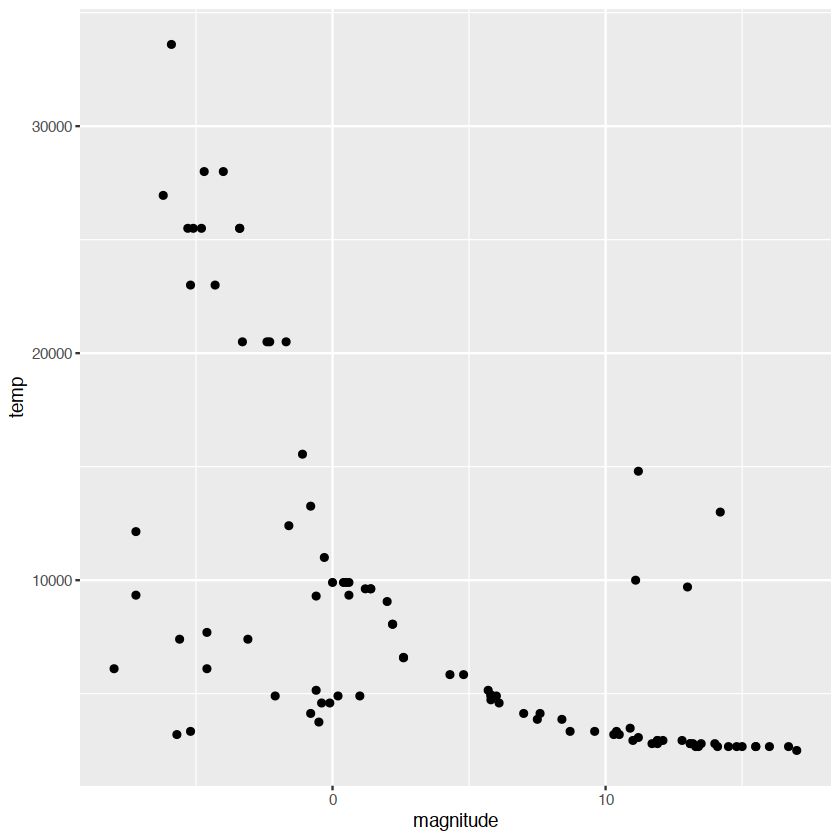

In [3]:
ggplot(data = stars) +
    geom_point(mapping = aes(x = magnitude, y = temp))

Interesting! It seems that higher `magnitude` values correspond to lower `temp` values. Astronomers define `magnitude` on a logarithmic scale. The star Vega is used as reference and its `magnitude` is defined as 0. A star of `magnitude` $m$ is about 2.5 times **brighter** than a star of `magnitude` $m+1$.

Let us also plot the `type` of stars by using it as the `color` attribute of dots.

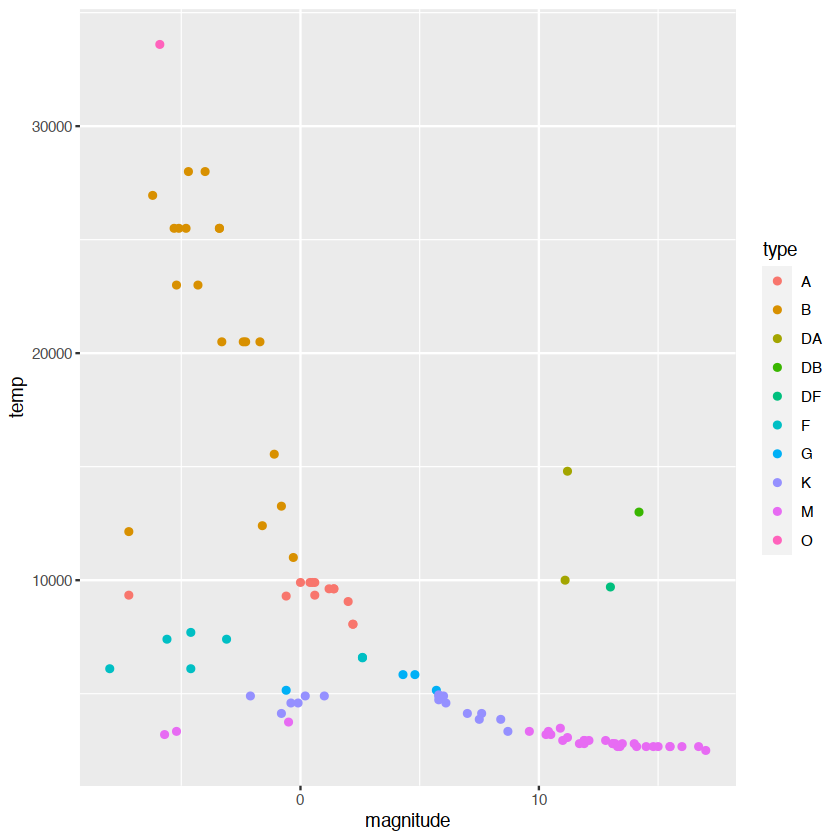

In [4]:
ggplot(data = stars) +
    geom_point(mapping = aes(x = magnitude, y = temp, color = type))

The type O star at the top left is the hottest whereas the type M stars at the bottom right are the coldest.

## Data Transformation

Let us load the `polls` dataset that has information about Brexit polls.

In [5]:
polls = readRDS("data/polls.rds")
print(polls)

# A tibble: 127 x 9
   startdate  enddate    pollster poll_type samplesize remain leave undecided
   <date>     <date>     <fct>    <fct>          <dbl>  <dbl> <dbl>     <dbl>
 1 2016-06-23 2016-06-23 YouGov   Online          4772   0.52  0.48      0   
 2 2016-06-22 2016-06-22 Populus  Online          4700   0.55  0.45      0   
 3 2016-06-20 2016-06-22 YouGov   Online          3766   0.51  0.49      0   
 4 2016-06-20 2016-06-22 Ipsos M… Telephone       1592   0.49  0.46      0.01
 5 2016-06-20 2016-06-22 Opinium  Online          3011   0.44  0.45      0.09
 6 2016-06-17 2016-06-22 ComRes   Telephone       1032   0.54  0.46      0   
 7 2016-06-17 2016-06-22 ComRes   Telephone       1032   0.48  0.42      0.11
 8 2016-06-16 2016-06-22 TNS      Online          2320   0.41  0.43      0.16
 9 2016-06-20 2016-06-20 Survati… Telephone       1003   0.45  0.44      0.11
10 2016-06-18 2016-06-19 YouGov   Online          1652   0.42  0.44      0.13
# … with 117 more rows, and 1 more variable:

Let us see how the column `undecided`, the fraction of undecided voters, looks over time.

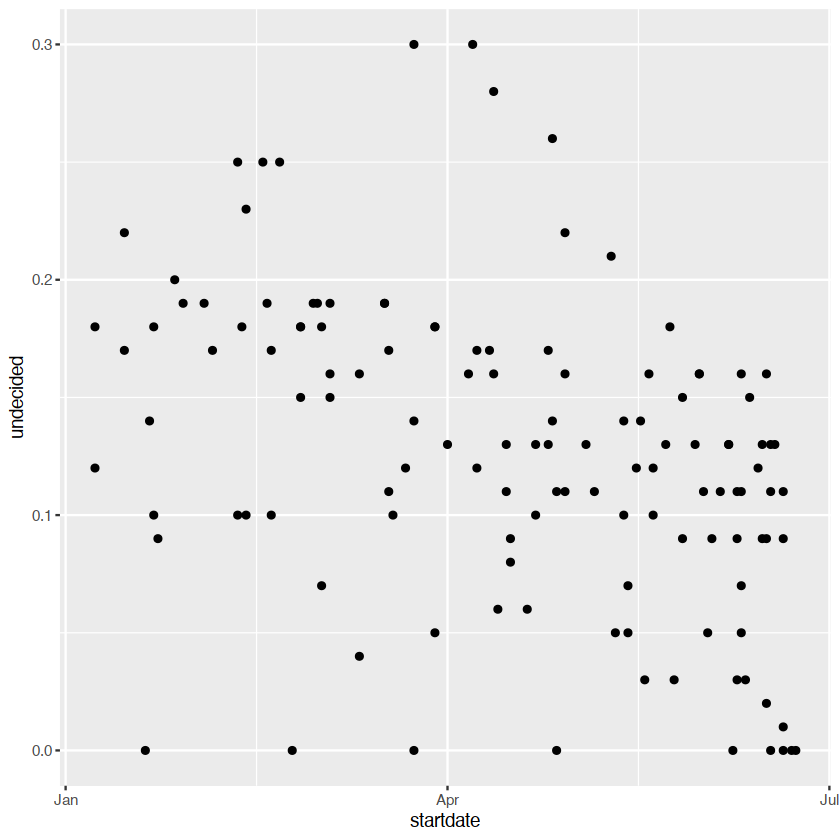

In [6]:
ggplot(data = polls) + geom_point(mapping = aes(x = startdate, y = undecided))

Oops! This does not seem to show any trend. Let us see if switching to `geom_smooth`, another available geometry in `ggplot2`, helps us see a trend.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



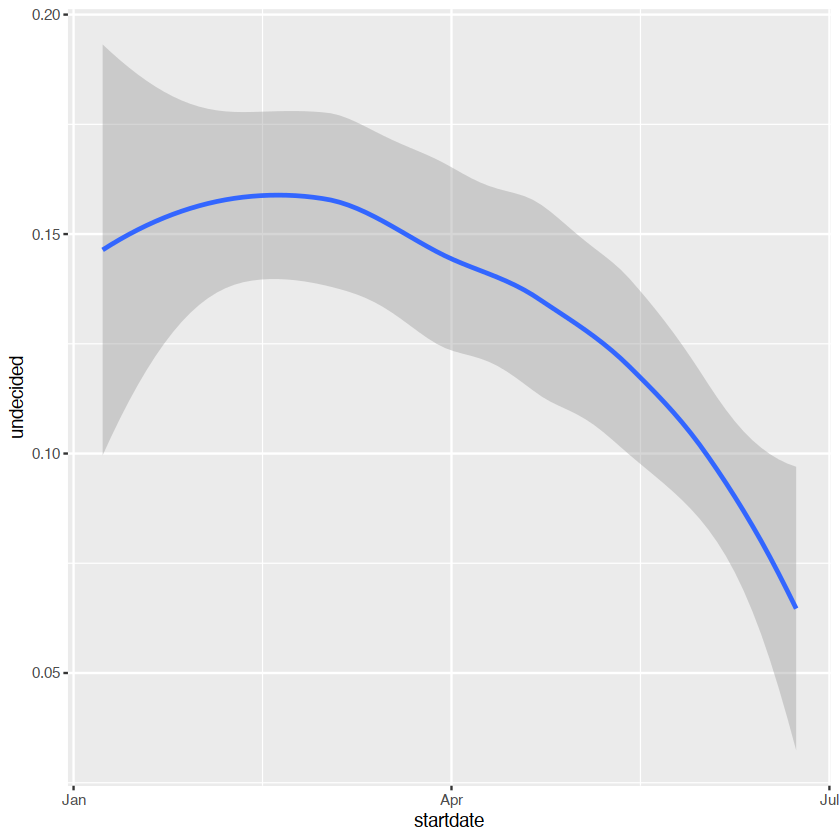

In [7]:
ggplot(data = polls) + geom_smooth(mapping = aes(x = startdate, y = undecided))

Ok, so this seems to suggest that the fraction of undecided voter went down with time.

Now let us look at who was conducting these polls, i.e., the `pollster` column.

In [8]:
poll_counts <- group_by(polls, pollster) %>% summarize(count = n())
print(poll_counts)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 16 x 2
   pollster                          count
   <fct>                             <int>
 1 BMG Research                          7
 2 ComRes                               10
 3 Greenberg Quinlan Rosner Research     1
 4 ICM                                  28
 5 Ipsos MORI                            7
 6 Opinium                               9
 7 ORB                                  14
 8 ORB/Telegraph                         1
 9 Panelbase                             1
10 Populus                               1
11 Populus/Number Cruncher Politics      4
12 Survation                             7
13 Survation/IG Group                    1
14 TNS                                   9
15 YouGov                               26
16 YouGov/The Times                      1


There are a few counts of 1. Let us find how many.

In [9]:
filter(poll_counts, count == 1) %>% print()

# A tibble: 6 x 2
  pollster                          count
  <fct>                             <int>
1 Greenberg Quinlan Rosner Research     1
2 ORB/Telegraph                         1
3 Panelbase                             1
4 Populus                               1
5 Survation/IG Group                    1
6 YouGov/The Times                      1


Let us add a new row `Other` with a count of 6.

In [10]:
poll_counts <- add_row(filter(poll_counts, count > 1), pollster='Other', count=6)
print(poll_counts)

# A tibble: 11 x 2
   pollster                         count
   <chr>                            <dbl>
 1 BMG Research                         7
 2 ComRes                              10
 3 ICM                                 28
 4 Ipsos MORI                           7
 5 Opinium                              9
 6 ORB                                 14
 7 Populus/Number Cruncher Politics     4
 8 Survation                            7
 9 TNS                                  9
10 YouGov                              26
11 Other                                6


Let us make a pie chart!

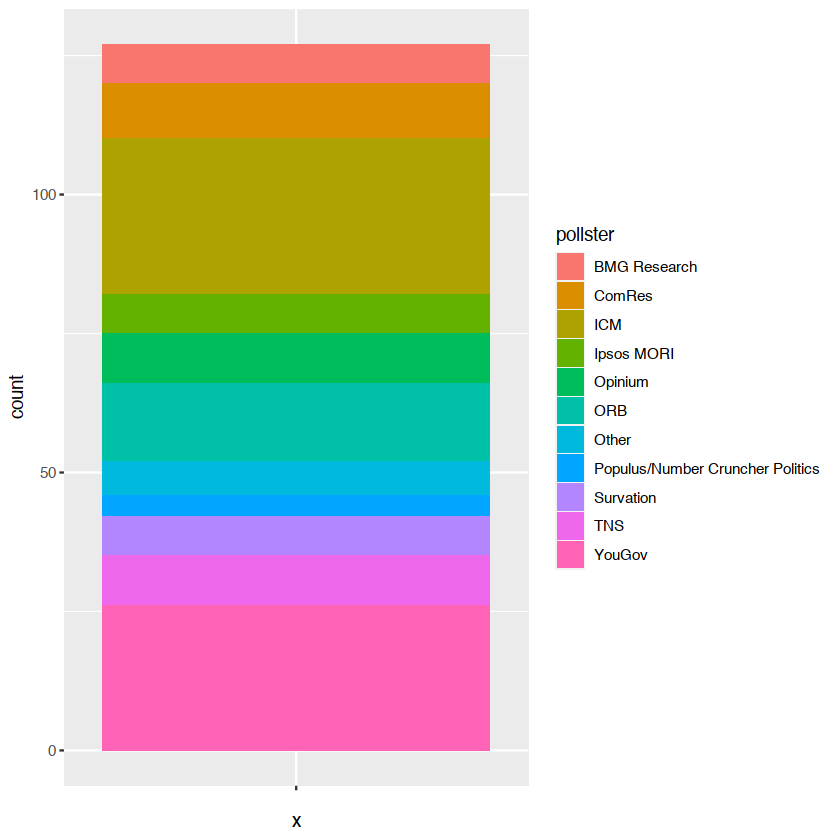

In [11]:
bp <- ggplot(poll_counts, aes(x="", y=count, fill=pollster)) + geom_bar(width = 1, stat = "identity")
bp

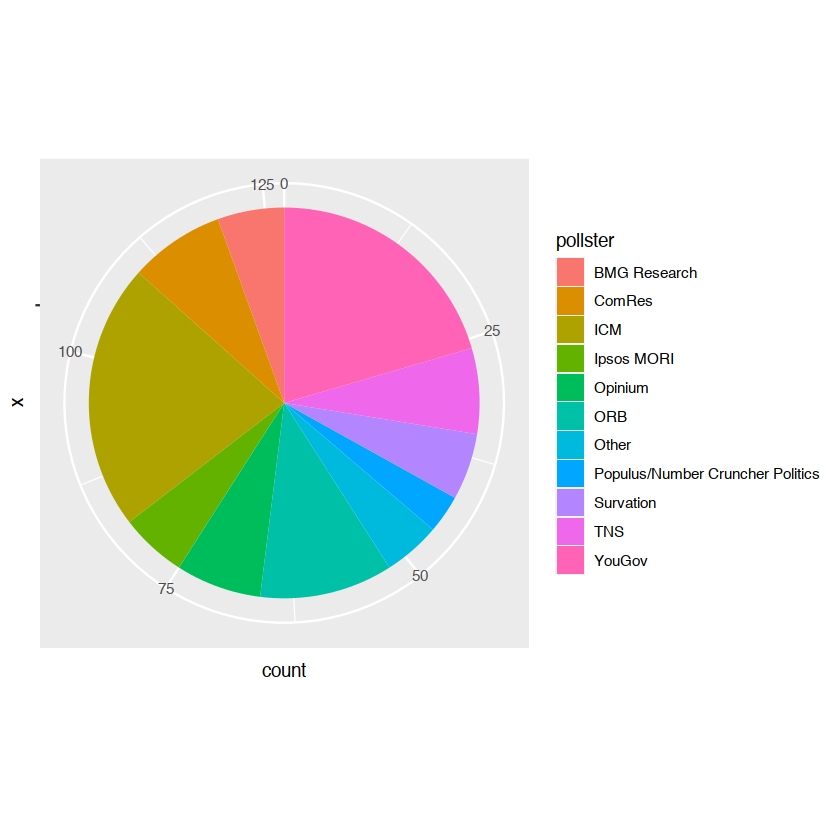

In [12]:
pie <- bp + coord_polar("y", start=0)
pie

## Exploratory Data Analysis

Let us now look at `olive`, a dataset containing the percentages of eight fatty acids in  572 Italian olive oils.

In [13]:
olive = readRDS("data/olive.rds")
print(olive)

# A tibble: 572 x 10
   region area  palmitic palmitoleic stearic oleic linoleic linolenic arachidic
   <fct>  <fct>    <dbl>       <dbl>   <dbl> <dbl>    <dbl>     <dbl>     <dbl>
 1 South… Nort…    10.8        0.75     2.26  78.2     6.72      0.36      0.6 
 2 South… Nort…    10.9        0.73     2.24  77.1     7.81      0.31      0.61
 3 South… Nort…     9.11       0.54     2.46  81.1     5.49      0.31      0.63
 4 South… Nort…     9.66       0.570    2.4   79.5     6.19      0.5       0.78
 5 South… Nort…    10.5        0.67     2.59  77.7     6.72      0.5       0.8 
 6 South… Nort…     9.11       0.49     2.68  79.2     6.78      0.51      0.7 
 7 South… Nort…     9.22       0.66     2.64  79.9     6.18      0.49      0.56
 8 South… Nort…    11          0.61     2.35  77.3     7.34      0.39      0.64
 9 South… Nort…    10.8        0.6      2.39  77.4     7.09      0.46      0.83
10 South… Nort…    10.4        0.55     2.13  79.4     6.33      0.26      0.52
# … with 562 more r

Let us try to understand the relationship between the percentages of oleic and linoleic acids.

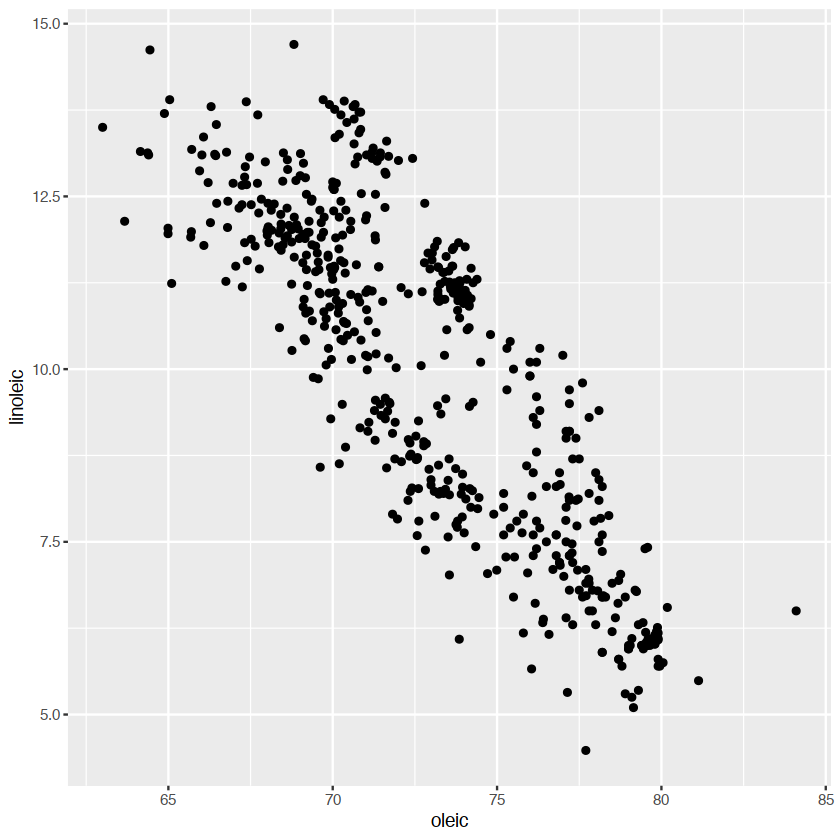

In [14]:
ggplot(data = olive) +
    geom_point(mapping = aes(x = oleic, y = linoleic))

We can change the geometry to `bin2d` that creates rectangular regions and uses full color to show how many points landed in each bin.

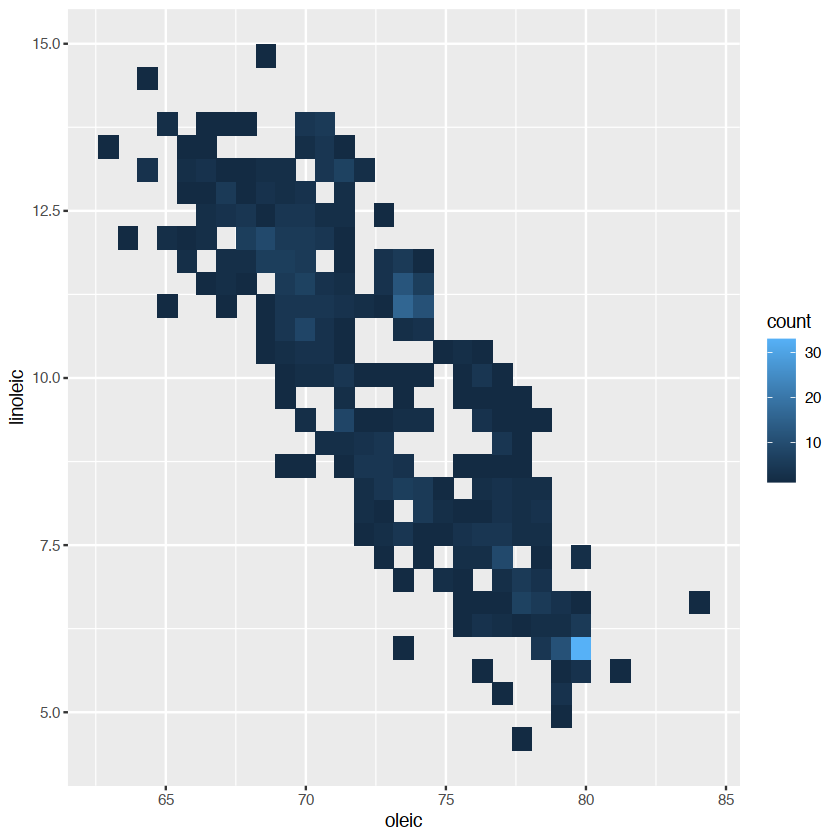

In [15]:
ggplot(data = olive) +
    geom_bin2d(mapping = aes(x = oleic, y = linoleic))

We can also choose hexagonal bins.

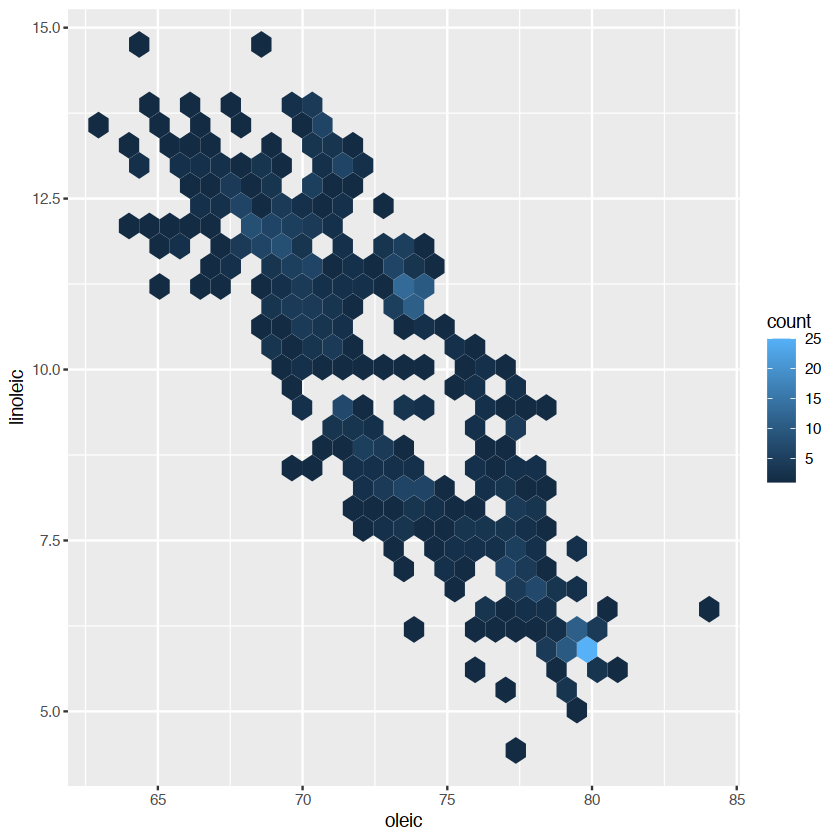

In [16]:
ggplot(data = olive) +
    geom_hex(mapping = aes(x = oleic, y = linoleic))

We can also use `geom_smooth` to create a smooth plot of the relationship between oleic and linoleic acid percanetages. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



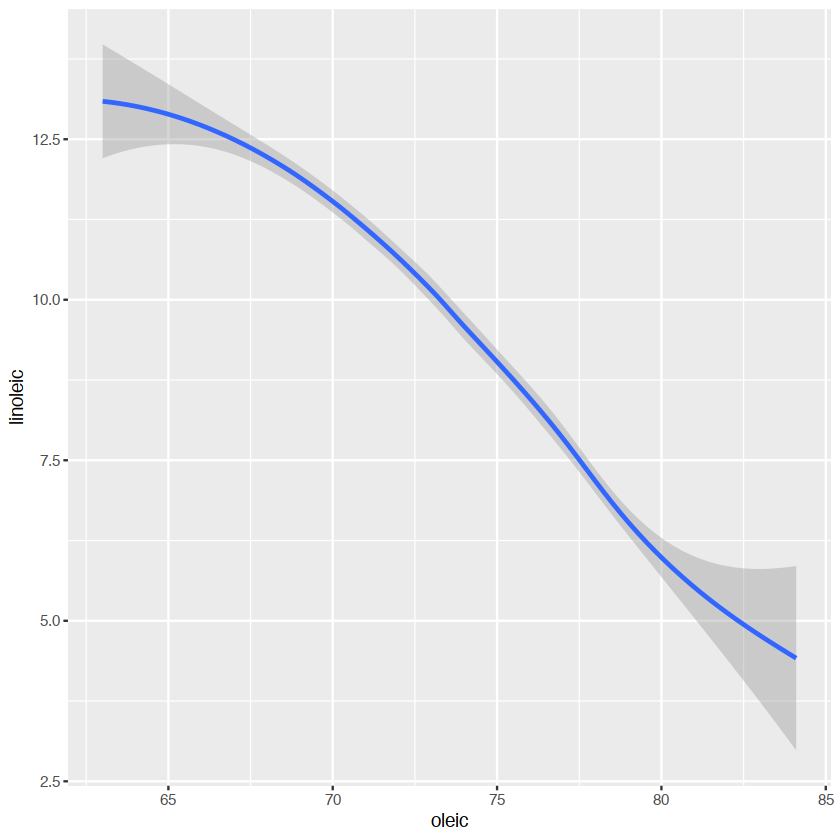

In [17]:
ggplot(data = olive) +
    geom_smooth(mapping = aes(x = oleic, y = linoleic))

What about the relationship between `region` and `oleic`? Since `region` is a categorical variable, let us use a **boxplot** using the `geom_boxplot` geometry.

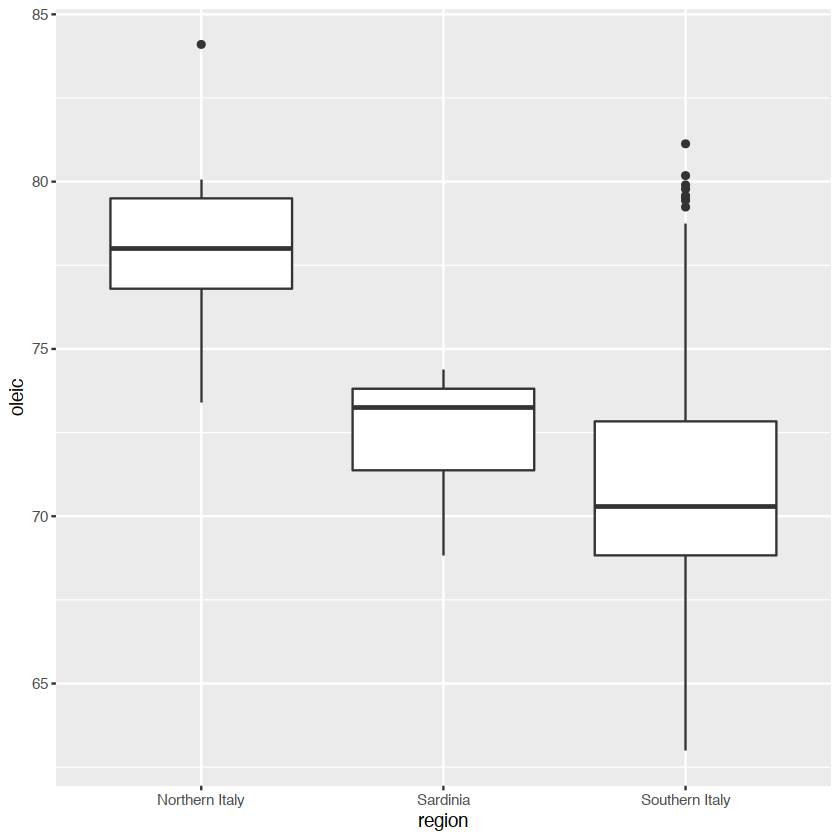

In [18]:
ggplot(data = olive) +
    geom_boxplot(mapping = aes(x = region, y = oleic))

Oil from Northern Italy seems to have the highest percentage of oleic acid. Let us see what happens if we look at linoleic acid by region.

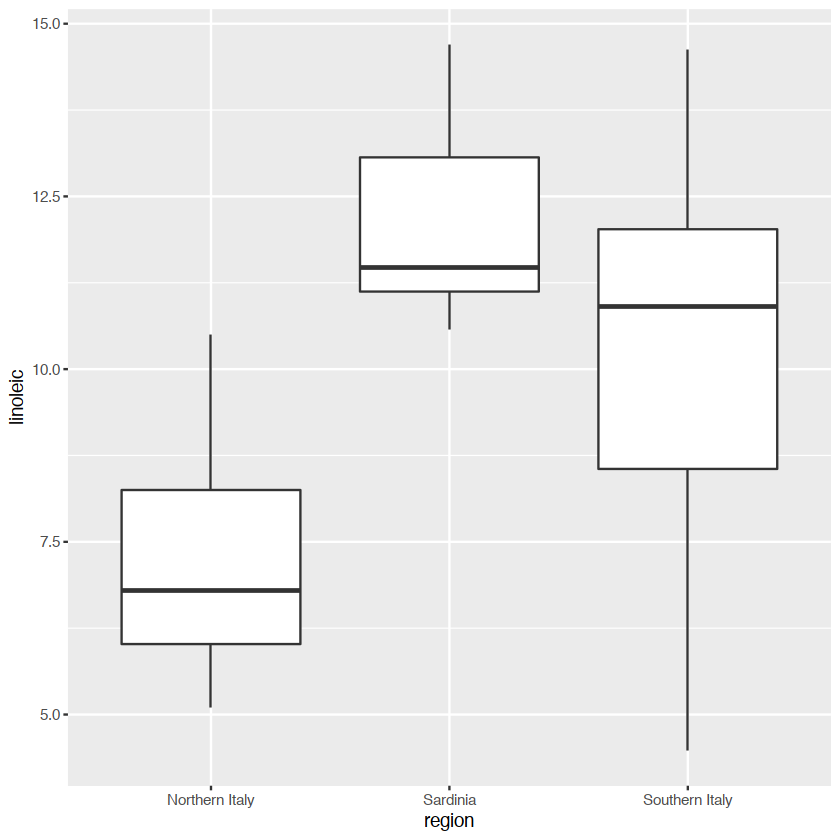

In [19]:
ggplot(data = olive) +
    geom_boxplot(mapping = aes(x = region, y = linoleic))

We now see why oleic and linoleic acid percentages had a negative correlation. Oils from Sardinia tends to have higher linoleic percentage and lower oleic percentage. Whereas it is the opposite case for oils from Northern Italy.

## Strings

Strings are sequences of characters and store textual data. Let us load the `stringr` package that supports string manipulation.

In [20]:
library(stringr)

All string manipulation functions in `stringr` start with `str_`. Here's how to compute the length of a string.

In [21]:
str_length("This is a short string.")

[1] 23

`str_c` can be used to join, or **concatenate**, strings.

In [22]:
str_c("United we stand,","divided we fall.")

[1] "United we stand,divided we fall."

Oops, that didn't put a space in between. We can add it using the `sep` argument.

In [23]:
str_c("United we stand,","divided we fall.", sep=" ")

[1] "United we stand, divided we fall."

We can **sort** strings in alphabetic order.

In [24]:
book_parts = c("explore", "wrangle", "program", "model", "communicate")
str_sort(book_parts)

[1] "communicate" "explore"     "model"       "program"     "wrangle"

We can look for patterns in strings using `str_view`. For example, let us try to find a very simple pattern -- the letter "m" -- in the language names above.

In [25]:
str_view(book_parts, "m")

HTML widgets cannot be represented in plain text (need html)

`str_view` matches only the first occurence of a pattern. To match all occurrences, we can use `str_view_all`

In [26]:
str_view_all(book_parts, "m")

HTML widgets cannot be represented in plain text (need html)

To find a pattern only at the end of a strong, we can use the anchor "$" that matches the end of a string.

In [27]:
str_view(book_parts, "m$")

HTML widgets cannot be represented in plain text (need html)

If we only want to find out whether a pattern matches a string, we can use `str_detect`. In the code below `[aeiou]` is a group that matches any letter in the given group, in this case all 5 vowels in the English alphabet.

In [28]:
str_detect(book_parts, "[aeiou]$")

[1]  TRUE  TRUE FALSE FALSE  TRUE

## Dates and Times

The `lubridate` package helps us work with dates and times.

In [29]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Here's how to get today's date as a date object and the current time as a date-time object.

In [30]:
today()
now()

Warning message in with_tz(Sys.time(), tzone):
“Unrecognized time zone ''”


[1] "2020-12-15"

Warning message in with_tz(Sys.time(), tzone):
“Unrecognized time zone ''”


[1] "2020-12-15 13:53:49 EST"

Let us load a dataset about polls before the 2016 US Presidential Elections.

In [31]:
polls2016 = readRDS("data/polls2016.rds")
print(polls2016)

# A tibble: 4,208 x 15
   state startdate  enddate    pollster grade samplesize population
   <fct> <date>     <date>     <fct>    <fct>      <int> <chr>     
 1 U.S.  2016-11-03 2016-11-06 ABC New… A+          2220 lv        
 2 U.S.  2016-11-01 2016-11-07 Google … B          26574 lv        
 3 U.S.  2016-11-02 2016-11-06 Ipsos    A-          2195 lv        
 4 U.S.  2016-11-04 2016-11-07 YouGov   B           3677 lv        
 5 U.S.  2016-11-03 2016-11-06 Gravis … B-         16639 rv        
 6 U.S.  2016-11-03 2016-11-06 Fox New… A           1295 lv        
 7 U.S.  2016-11-02 2016-11-06 CBS New… A-          1426 lv        
 8 U.S.  2016-11-03 2016-11-05 NBC New… A-          1282 lv        
 9 New … 2016-11-06 2016-11-06 Zia Poll NA          8439 lv        
10 U.S.  2016-11-04 2016-11-07 IBD/TIPP A-          1107 lv        
# … with 4,198 more rows, and 8 more variables: rawpoll_clinton <dbl>,
#   rawpoll_trump <dbl>, rawpoll_johnson <dbl>, rawpoll_mcmullin <dbl>,
#   adjpoll_clinto

We can now plot a histogram of polls by start date. We will use a binwidth of a week.

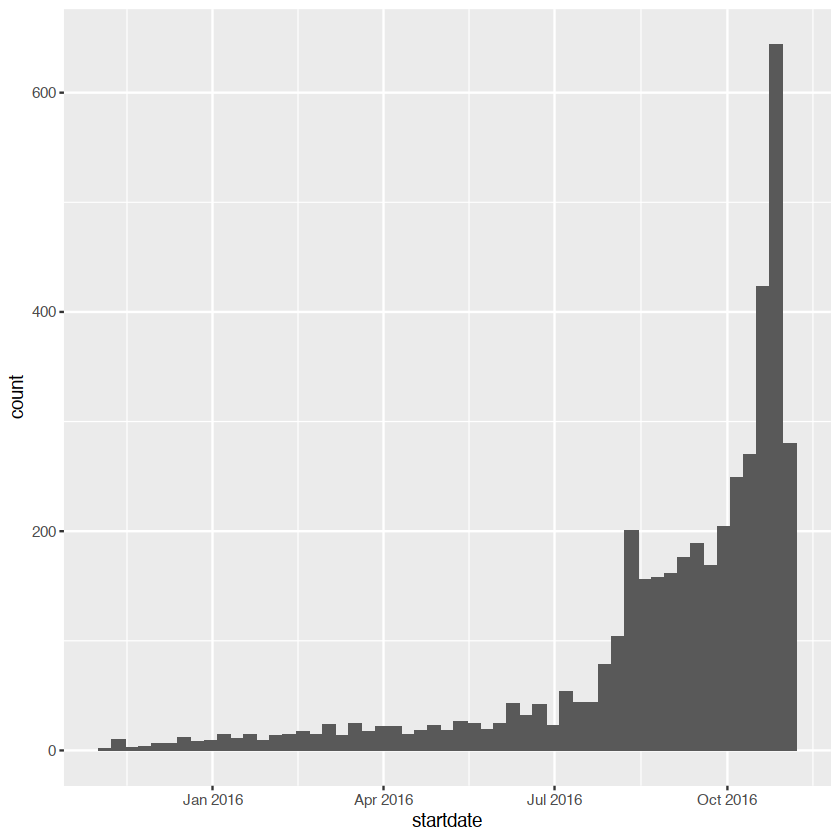

In [32]:
ggplot(data = polls2016) +
  geom_histogram(mapping=aes(x = startdate), binwidth=7)  # bin width for date-time is in seconds

This makes sense. There are more polls closer to the election day.

Let us look at the start days, i.e., the day of the week corresponding to the start date. Perhaps pollster tend to start more polls on a partocular day of the week. Let us first add a column `startday` to our data frame.

In [33]:
polls2016_day <- mutate(polls2016, startday = wday(startdate, label=TRUE))
print(select(polls2016_day,startdate,startday,enddate,pollster,samplesize))

# A tibble: 4,208 x 5
   startdate  startday enddate    pollster                            samplesize
   <date>     <ord>    <date>     <fct>                                    <int>
 1 2016-11-03 Thu      2016-11-06 ABC News/Washington Post                  2220
 2 2016-11-01 Tue      2016-11-07 Google Consumer Surveys                  26574
 3 2016-11-02 Wed      2016-11-06 Ipsos                                     2195
 4 2016-11-04 Fri      2016-11-07 YouGov                                    3677
 5 2016-11-03 Thu      2016-11-06 Gravis Marketing                         16639
 6 2016-11-03 Thu      2016-11-06 Fox News/Anderson Robbins Research…       1295
 7 2016-11-02 Wed      2016-11-06 CBS News/New York Times                   1426
 8 2016-11-03 Thu      2016-11-05 NBC News/Wall Street Journal              1282
 9 2016-11-06 Sun      2016-11-06 Zia Poll                                  8439
10 2016-11-04 Fri      2016-11-07 IBD/TIPP                                  1107
# … wi

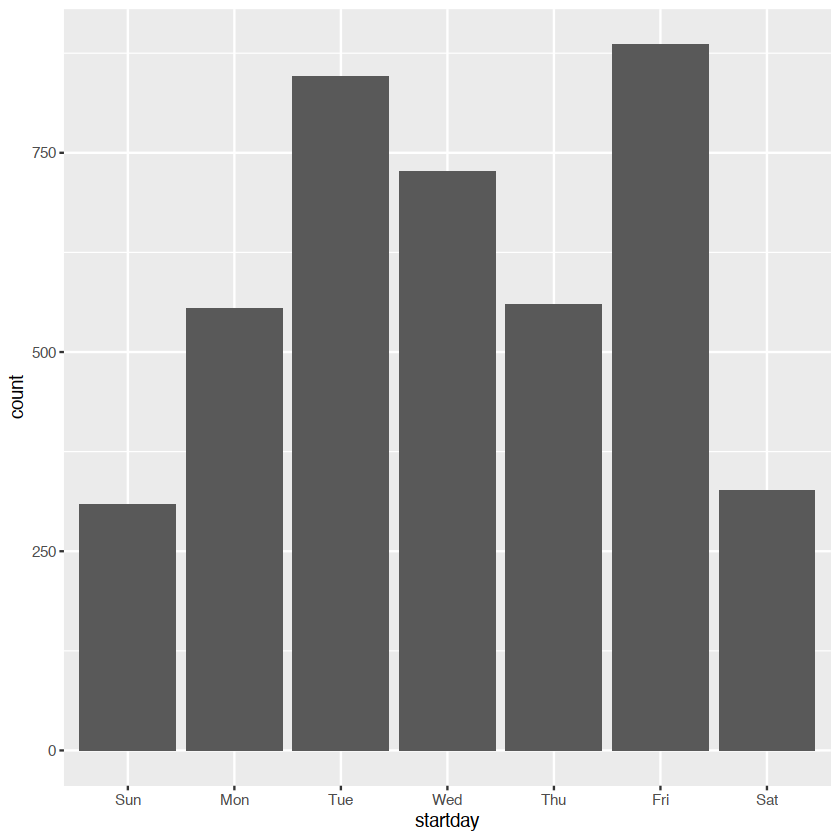

In [34]:
ggplot(data = polls2016_day) + geom_bar(mapping = aes(x = startday))

## Functions

Functions are the most basic mechanism for code reuse. If you find yourself copying and pasting code more than twice, you probably want to think about writing a function. Then, later changes only need to be done in one place and not in all the many places where you copied your code.

In [35]:
greet <- function(x) {
    str_c("Nice to meet you ", x, "!")
}

In [36]:
greet("306 students")

[1] "Nice to meet you 306 students!"

In [37]:
greet("programmers")

[1] "Nice to meet you programmers!"

In [38]:
greet("data scientists")

[1] "Nice to meet you data scientists!"

`greet` is the **name** of our function. `x` is the **argument** to the function and the code between the curly brackets `{` and `}` is the **body** of the function.

Let's see what happens when we don't provide an argument.

In [39]:
greet()

ERROR: Error in str_c("Nice to meet you ", x, "!"): argument "x" is missing, with no default


We can supply the **default** value of argument as the code below shows.

In [40]:
greet <- function(x = "friend") {
    str_c("Nice to meet you ", x, "!")
}

If we suply the argument, the function works as before.

In [41]:
greet('stranger')

[1] "Nice to meet you stranger!"

If we don't, it uses the default argument.

In [42]:
greet()

[1] "Nice to meet you friend!"

Let's see what happens when we pass along the empty string "" as an argument to `say_hello`.

In [43]:
greet("")

[1] "Nice to meet you !"

Perhaps, we don't like the space between "you" and "!" in this case. So we will add a check to see if the argument is an empty string.

In [44]:
greet <- function(x = "friend") {
    if (str_length(x) == 0) {
        "Nice to meet you!"
    } else {
        str_c("Nice to meet you ", x, "!")
    }
}

In [45]:
greet("")

[1] "Nice to meet you!"

We just saw an instance of **conditional execution** of code using the `if` statement.

## Vectors

R has two types of vectors:

**Atomic vectors**: These are homogeneous in the sense that every element is of the same type. For example, logical, integer, double, character.

**Lists**: These are heterogenous in the sense that different elements can be of different types. In particular, a list can contain another list.

In [46]:
library(matlab)


Attaching package: ‘matlab’


The following object is masked from ‘package:stats’:

    reshape


The following objects are masked from ‘package:utils’:

    find, fix


The following object is masked from ‘package:base’:

    sum




In [47]:
(my_lgl_vector <- isprime(1:10) == 1) # TRUE if prime, FALSE if composite

[1] FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE

In [48]:
typeof(my_lgl_vector)

[1] "logical"

In [49]:
length(my_lgl_vector)

[1] 10

In [50]:
(my_dbl_vector <- 101:110 / 100)

[1] 1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.10

In [51]:
sqrt(my_dbl_vector)

[1] 1.004988 1.009950 1.014889 1.019804 1.024695 1.029563 1.034408 1.039230
 [9] 1.044031 1.048809

In [52]:
sqrt(my_dbl_vector) ^ 2

[1] 1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.10

In [53]:
sqrt(my_dbl_vector) ^ 2 == my_dbl_vector

[1] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE

In [54]:
near(sqrt(my_dbl_vector) ^ 2, my_dbl_vector)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

## Iteration

**Iteration** is an important concept in programming. It refers to doing the same operations repeatedly. Let us consider the famous *Fibonacci sequence* whose $n$th term is defined as

$$ F(n+1) = F(n) + F(n-1) $$

starting with $F(1) = 0$ and $F(2) = 1$.

The code below computes the first 10 Fibonacci numbers using a **for loop**.

In [55]:
previous = 0
current = 1
for (i in 1:10) {
    print(previous)
    new = current + previous
    previous = current
    current = new
}

[1] 0
[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34


What if we want to print all Fibonacci numbers less than 1000. We do not know how long that will take. To iterate a computation as long as some condition is true, we can use a **while loop**.

In [56]:
previous = 0
current = 1
while (previous < 1000) {
    print(previous)
    new = current + previous
    previous = current
    current = new
}

[1] 0
[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34
[1] 55
[1] 89
[1] 144
[1] 233
[1] 377
[1] 610
[1] 987
